In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle, Arc, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.patches import Arrow
from matplotlib.patches import FancyArrowPatch

In [22]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["mathtext.fontset"] = 'stix'

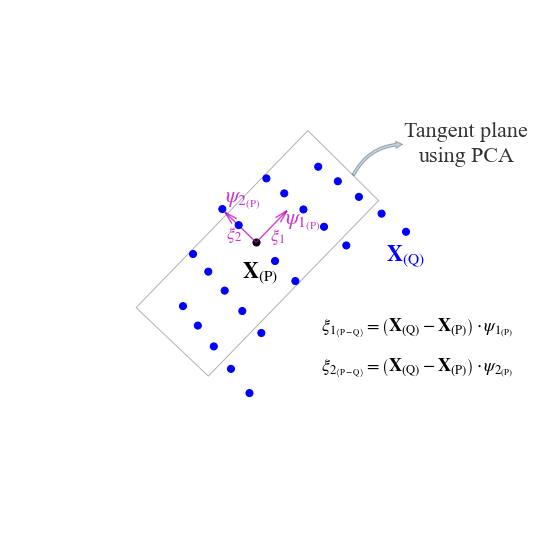

In [35]:
t1 = np.pi/180 * 90
t2 = np.pi/180 * 180
t0 = (t1+t2)/2
N = 5
R = 5
qr = 6.7
dt = (t2-t1)/(N-1)
dz = R*dt

p_idx = int(N*N/2)
q_idx = 0
        
nodes = np.zeros((0, 3)) 

for i in range(N):
    for j in range(N):
        qt = t1 + dt*i
        qy = qr*np.cos(qt)
        qz = qr*np.sin(qt)
        qx = dz*j
        if i*N+j != p_idx:
            nodes = np.append(nodes, [[qx, qy, qz]], axis=0)
        else:
            p_node = np.array([qx, qy, qz])
        
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(nodes[:,0], nodes[:,1], nodes[:,2], color='b', s=50, alpha = 1)
ax.scatter(p_node[0], p_node[1], p_node[2], color='k', s=50, alpha = 1)

# Xp
idx1 = 6
idx2 = 22
cst = 0.53
ax.text((cst)*nodes[idx1,0]+(1-cst)*nodes[idx2,0], 
        (cst)*nodes[idx1,1]+(1-cst)*nodes[idx2,1], 
        (cst)*nodes[idx1,2]+(1-cst)*nodes[idx2,2], 
        r'$\mathbf{X}_{\rm (P)}$',
        color='black', fontsize=22, ha='center', va='center')

# Xq
idx1 = 4
cst1 = 1
cst2 = 0.
cst3 = 0.85
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2], 
        r'$\mathbf{X}_{\rm (Q)}$',
        color='blue', fontsize=22, ha='center', va='center')

# 2D surface
t_deg = 45
A = [0,0]
B = [10,0]
C = [10,10]
D = [0,10]
p = Rectangle(xy=(-9,0.), width=5, height=12, angle=-t_deg, fill=False, alpha=0.3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# base vectors
tt = t_deg * np.pi/180

u = 0
v = np.cos(tt)
w = np.sin(tt)
x = p_node[0]
y = p_node[1]
z = p_node[2]
ax.quiver(x, y, z, u, v, w, length=2, normalize=True, color='m', alpha=0.7)

u = 0
v = np.cos(tt+np.pi/2)
w = np.sin(tt+np.pi/2)
x = p_node[0]
y = p_node[1]
z = p_node[2]
ax.quiver(x, y, z, u, v, w, length=2, normalize=True, color='m', alpha=0.7)

# psi1
idx1 = 7
cst1 = 1
cst2 = 1.02
cst3 = 0.9
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2], 
        r'$\psi_{1_{({\rm P})}}$',
        color='m', fontsize=22, ha='center', va='center', alpha=0.8)

# xi1
idx1 = 7
cst1 = 1
cst2 = 1.47
cst3 = 0.8
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2], r'$\xi_1$',
         color='m', fontsize=18, ha='center', va='center', alpha=0.8)

# psi2
idx1 = 10
cst1 = 1
cst2 = 0.79
cst3 = 1.08
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2], 
        r'$\psi_{2_{({\rm P})}}$',
        color='m', fontsize=22, ha='center', va='center', alpha=0.8)

# xi2
idx1 = 11
cst1 = 1
cst2 = 1.05
cst3 = 0.9
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2], 
        r'$\xi_2$',
        color='m', fontsize=18, ha='center', va='center', alpha=0.8)


# Eqs.
ax.text(0, 
        R, 
        -R*0.3,
        r'$\xi_{1_{\langle {\rm P-Q} \rangle}} = \left( \mathbf{X}_{({\rm Q})} - \mathbf{X}_{({\rm P})} \right) \cdot \psi_{1_{({\rm P})}}$',
        color='k', fontsize=18, ha='center', va='center', alpha=1)
ax.text(0, 
        R, 
        -R*0.7,
        r'$\xi_{2_{\langle {\rm P-Q} \rangle}} = \left( \mathbf{X}_{({\rm Q})} - \mathbf{X}_{({\rm P})} \right) \cdot \psi_{2_{({\rm P})}}$',
        color='k', fontsize=18, ha='center', va='center', alpha=1)


# PCA
p = FancyArrowPatch((1.75,6.25), (4.2,7.7),
                             connectionstyle="arc3,rad=-.3", alpha=0.3, mutation_scale=2000)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

ax.text(0, 
        R*1.48, 
        R*1.65,
        r'Tangent plane',
        color='k', fontsize=22, ha='center', va='center', alpha=0.8)

ax.text(0, 
        R*1.48, 
        R*1.4,
        r'using PCA',
        color='k', fontsize=22, ha='center', va='center', alpha=0.8)


# fix camera view
ax.view_init(10, -10)
ax.set_box_aspect((3, 1, 1))

# turn axes off
plt.axis('off');

plt.savefig('surface_reconstruction.png', bbox_inches='tight', dpi = 500, facecolor='w')

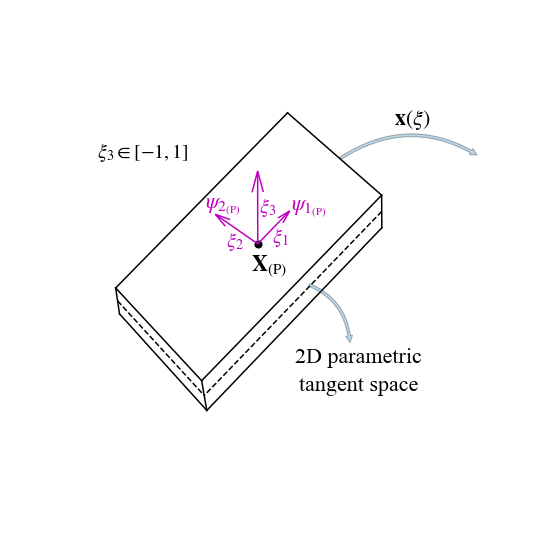

In [48]:
t1 = np.pi/180 * 90
t2 = np.pi/180 * 180
t0 = (t1+t2)/2
N = 5
R = 5
qr = 6.7
dt = (t2-t1)/(N-1)
dz = R*dt

p_idx = int(N*N/2)
q_idx = 0
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


# 2D surface
t_deg = 45

A = np.array([-1,-9,0])
B = np.array([4,-7,-1.5])
C = np.array([4,1,6.5])
D = np.array([-2,0,8])

E = np.array([-0.5,-9,-1])
F = np.array([4.5,-7,-2.5])
G = np.array([4.5,0.7,5.3])

H = (A+E)/2
I = (B+F)/2
J = (C+G)/2

ax.plot([A[0],B[0]],
        [A[1],B[1]],
        [A[2],B[2]],
        'k',
        alpha=1)

ax.plot([C[0],B[0]],
        [C[1],B[1]],
        [C[2],B[2]],
        'k',
        alpha=1)

ax.plot([C[0],D[0]],
        [C[1],D[1]],
        [C[2],D[2]],
        'k',
        alpha=1)

ax.plot([A[0],D[0]],
        [A[1],D[1]],
        [A[2],D[2]],
        'k',
        alpha=1)

ax.plot([A[0],E[0]],
        [A[1],E[1]],
        [A[2],E[2]],
        'k',
        alpha=1)

ax.plot([F[0],E[0]],
        [F[1],E[1]],
        [F[2],E[2]],
        'k',
        alpha=1)

ax.plot([F[0],B[0]],
        [F[1],B[1]],
        [F[2],B[2]],
        'k',
        alpha=1)

ax.plot([F[0],G[0]],
        [F[1],G[1]],
        [F[2],G[2]],
        'k',
        alpha=1)

ax.plot([C[0],G[0]],
        [C[1],G[1]],
        [C[2],G[2]],
        'k',
        alpha=1)

ax.plot([H[0],I[0]],
        [H[1],I[1]],
        [H[2],I[2]],
        'k--',
        alpha=1)

ax.plot([J[0],I[0]],
        [J[1],I[1]],
        [J[2],I[2]],
        'k--',
        alpha=1)

# reference node
p_ref = np.array([4, -4.5,  4.5])
ax.scatter(p_ref[0], p_ref[1], p_ref[2], color='k', s=50, alpha = 1)

ax.text(4, -4,  3.5,
        r'$\mathbf{X}_{\rm (P)}$',
        color='black', fontsize=22, ha='center', va='center')

# base vectors
tt = t_deg * np.pi/180

u = 0
v = np.cos(tt)
w = np.sin(tt)
x = p_ref[0]
y = p_ref[1]
z = p_ref[2]
ax.quiver(x, y, z, u, v, w, length=2, normalize=True, color='m', alpha=1)

u = 0
v = np.cos(tt+np.pi*0.55)
w = np.sin(tt+np.pi*0.55)
x = p_ref[0]
y = p_ref[1]
z = p_ref[2]
ax.quiver(x, y, z, u, v, w, length=2.3, normalize=True, color='m', alpha=1)

u = 0
v = np.cos(np.pi/2)
w = np.sin(np.pi/2)
x = p_ref[0]
y = p_ref[1]
z = p_ref[2]
ax.quiver(x, y, z, u, v, w, length=3.2, normalize=True, color='m', alpha=1)

# psi1
ax.text(4, -2.25, 6,
        r'$\psi_{1_{({\rm P})}}$',
        color='m', fontsize=22, ha='center', va='center', alpha=1)

# xi1
ax.text(4, -3.5, 4.75,
        r'$\xi_1$',
        color='m', fontsize=20, ha='center', va='center', alpha=1)

# psi2
ax.text(-1.5, -3.5, 3.6, 
        r'$\psi_{2_{({\rm P})}}$',
        color='m', fontsize=22, ha='center', va='center', alpha=1)

# xi2
ax.text(0, -3.6, 2.6,
        r'$\xi_2$',
        color='m', fontsize=20, ha='center', va='center', alpha=1)

# xi3
ax.text(0, -2.05, 4.2,
        r'$\xi_3$',
        color='m', fontsize=20, ha='center', va='center', alpha=1)


# text
p = FancyArrowPatch((0,0.4,1.5), (2,-2.5,0), 
                             connectionstyle="arc3,rad=-.3", alpha=0.3, mutation_scale=2000)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

ax.text(4,0,-0.75,
        r'2D parametric',
        color='k', fontsize=22, ha='center', va='center', alpha=1)

ax.text(4,0,-2,
        r'tangent space',
        color='k', fontsize=22, ha='center', va='center', alpha=1)

# xi3 
ax.text(0,-8,7,
        r'$\xi_3\in[-1,1]$',
        color='k', fontsize=20, ha='center', va='center', alpha=1)


# deformation
p = FancyArrowPatch((1.5,6.5), (8.2,6.5),
                             connectionstyle="arc3,rad=-.3", alpha=0.3, mutation_scale=2000)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

ax.text(0, 5, 8.25,
        r'$\mathbf{x}(\xi)$',
        color='k', fontsize=22, ha='center', va='center', alpha=1)


# fix camera view
ax.view_init(10, -10)
ax.set_box_aspect((3, 1, 1))

ax.set_xlim([1,8])
ax.set_ylim([-7,0])
ax.set_zlim([0,7])

# turn axes off
plt.axis('off');

plt.savefig('KL_kinematics_1.png', bbox_inches='tight', dpi = 500, facecolor='w')

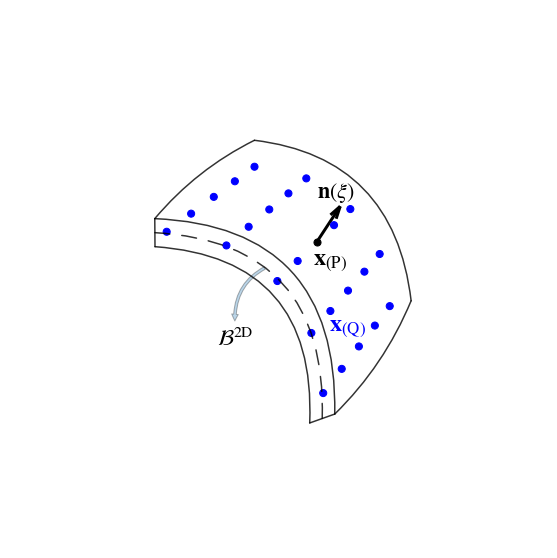

In [64]:
t1 = np.pi/180 * 0
t2 = np.pi/180 * 90
t0 = (t1+t2)/2
N = 5
R = 5
qr = 6.7
dt = (t2-t1)/(N-1)
dz = R*dt

p_idx = int(N*N/2)
q_idx = 0
        
nodes = np.zeros((0, 3)) 

for i in range(N):
    for j in range(N):
        qt = t1 + dt*i
        qy = qr*np.cos(qt)
        qz = qr*np.sin(qt)
        qx = dz*j
        if i*N+j != p_idx:
            nodes = np.append(nodes, [[qx, qy, qz]], axis=0)
        else:
            p_node = np.array([qx, qy, qz])
        
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(nodes[:,0], nodes[:,1], nodes[:,2], color='b', s=50, alpha = 1)
ax.scatter(p_node[0], p_node[1], p_node[2], color='k', s=50, alpha = 1)

# Xp
idx1 = 12
cst1 = 1
cst2 = 1.3
cst3 = 1.0
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2],  
        r'$\mathbf{x}_{\rm (P)}$',
        color='black', fontsize=24, ha='center', va='center')

# Xq
idx1 = 8
cst1 = 1.2
cst2 = 1.2
cst3 = 0.95
ax.text((cst1)*nodes[idx1,0], 
        (cst2)*nodes[idx1,1], 
        (cst3)*nodes[idx1,2], 
        r'$\mathbf{x}_{\rm (Q)}$',
        color='blue', fontsize=24, ha='center', va='center')


# fix camera view
ax.view_init(10, 10)
ax.set_box_aspect((3, 1, 1))

# boundary
A = np.array([0,8])
B = np.array([7.75,0.3])
C = np.array([-5,4])
D = np.array([4,-5.5])
E = np.array([-5,2.6])
F = np.array([2.75,-6])
G = (C+E)/2
H = (D+F)/2

p = FancyArrowPatch(A, B,
                    connectionstyle="arc3,rad=-.4", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(C, D,
                    connectionstyle="arc3,rad=-.5", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(B, D,
                    connectionstyle="arc3,rad=-.1", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(A, C,
                    connectionstyle="arc3,rad=.1", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(E, F,
                    connectionstyle="arc3,rad=-.5", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(E, C,
                    connectionstyle="arc3,rad=0", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(F, D,
                    connectionstyle="arc3,rad=0", arrowstyle="-", fill=False, alpha=0.8, lw=1.5)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

p = FancyArrowPatch(G, H,
                    connectionstyle="arc3,rad=-.5", arrowstyle="-", fill=False, alpha=0.8, lw=1.5, ls=(0, (10.0, 8.0)))
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# B2D
p = FancyArrowPatch((0.5,1.7), (-1,-1),
                             connectionstyle="arc3,rad=.3", alpha=0.3, mutation_scale=2000)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

ax.text(-2,-2,-3,
        r'$\mathcal{B}^{\rm 2D}$',
        color='k', fontsize=22, ha='center', va='center')

# normal vector
tt = 1
u = 0
v = np.cos(tt)
w = np.sin(tt)
x = p_node[0]
y = p_node[1]
z = p_node[2]
ax.quiver(x, y, z, u, v, w, length=2, normalize=True, color='k', alpha=1, lw=3)

ax.text(0, 4, 5.5,
        r'$\mathbf{n}({\xi})$',
        color='black', fontsize=22, ha='center', va='center')


# turn axes off
plt.axis('off');

plt.savefig('KL_kinematics_2.png', bbox_inches='tight', dpi = 500, facecolor='w')

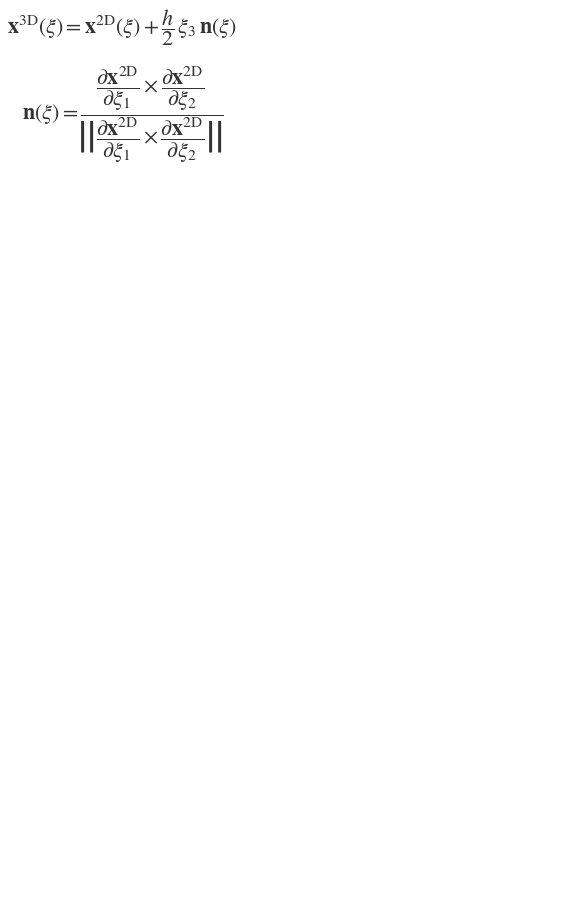

In [62]:
fig, ax = plt.subplots(figsize=(8,8))

# Eqs.
ax.text(0, 2, 
        r'$\mathbf{x}^{\rm 3D}(\xi) = \mathbf{x}^{\rm 2D}(\xi) + \dfrac{h}{2} \, \xi_3 \, \mathbf{n}(\xi)$',
        color='k', fontsize=22, ha='center', va='center', alpha=0.8);

ax.text(0, 1.8, 
        r'$\mathbf{n}(\xi) = \dfrac{ \dfrac{\partial \mathbf{x}^{\rm 2D}}{\partial \xi_1} \times \dfrac{\partial \mathbf{x}^{\rm 2D}}{\partial \xi_2} }{\ \ \ \dfrac{\partial \mathbf{x}^{\rm 2D}}{\partial \xi_1} \times \dfrac{\partial \mathbf{x}^{\rm 2D}}{\partial \xi_2} \ \ \ }$',
        color='k', fontsize=22, ha='center', va='center', alpha=0.8);

ax.text(-0.082, 1.74, 
        r'$||$',
        color='k', fontsize=46, ha='center', va='center', alpha=0.8);

ax.text(0.205, 1.74, 
        r'$||$',
        color='k', fontsize=46, ha='center', va='center', alpha=0.8);


# turn axes off
plt.axis('off');

plt.savefig('KL_kinematics_3.png', bbox_inches='tight', dpi = 500, facecolor='w')

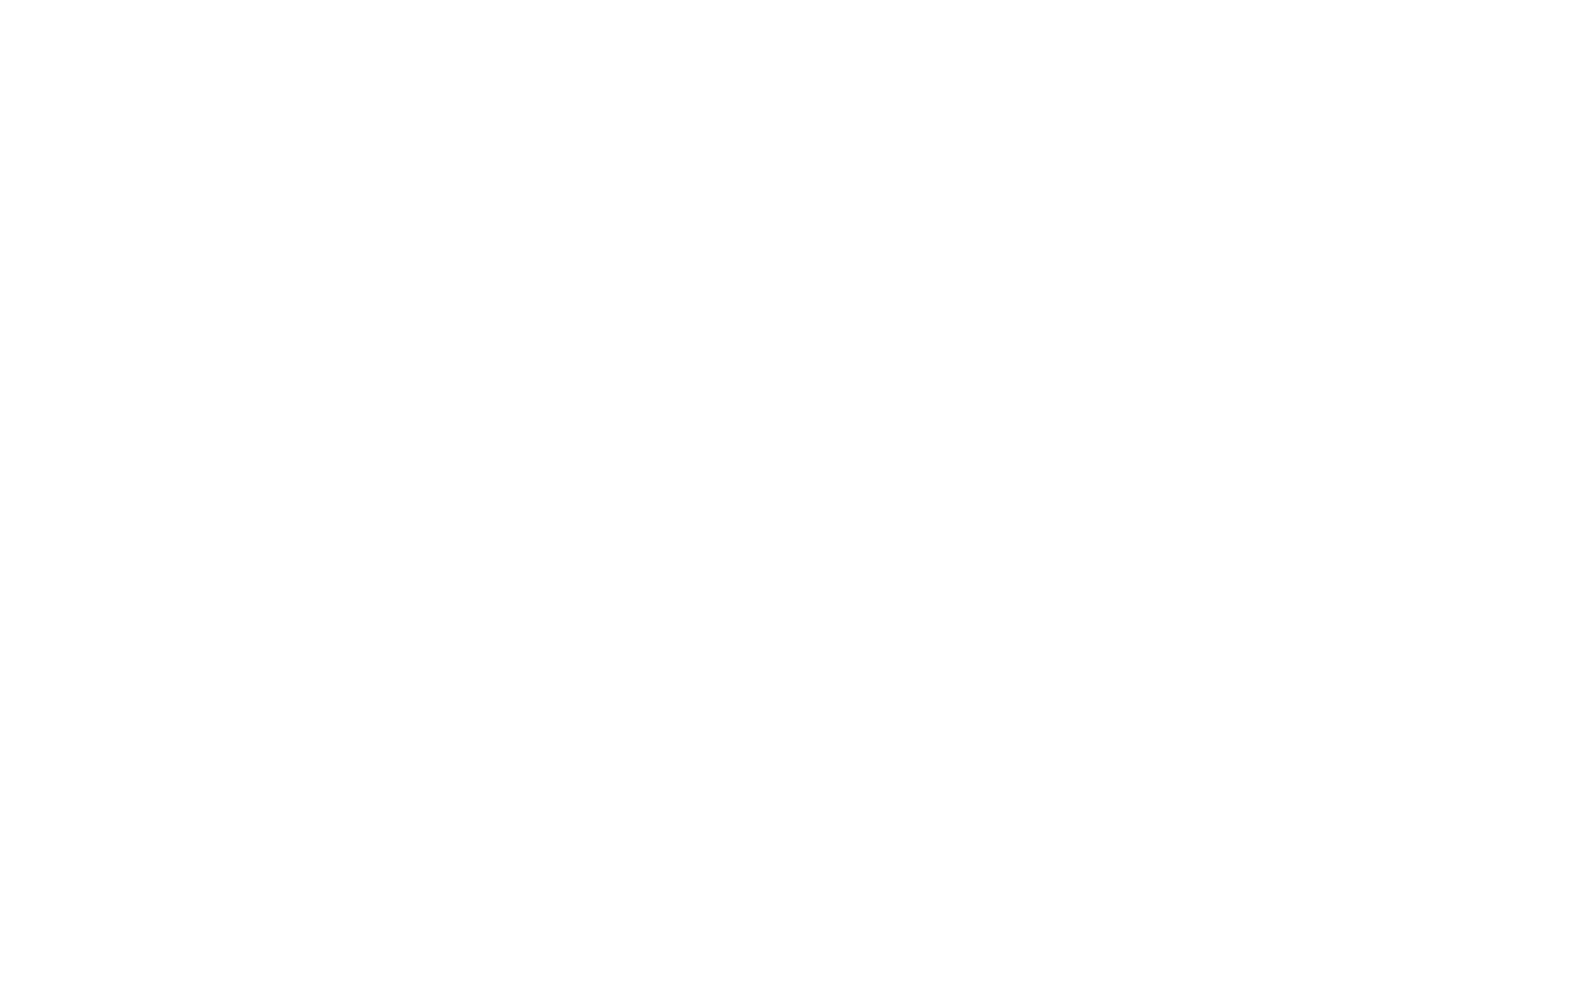

In [65]:
fig, ax = plt.subplots(figsize=(28,18))



# turn axes off
plt.axis('off');

plt.savefig('KL_kinematics_0.png', bbox_inches='tight', dpi = 500, facecolor='w')